# Numerische Lösung von Differentialgleichungen

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Windwiderstand
$$\frac{dv(t)}{dt}=-\gamma v(t)^2$$
Die Lösuhg lautet
$$v(t)=\frac{1}{\gamma\cdot t+t}$$

In [2]:
def f(t,v):
    gamma = 0.1
    dvdt = -gamma*v**2
    return dvdt

In [28]:
'''
Wir benutzen 2 Methoden um die Differentialgleichung für die Abnahme der Geschwindigkeit 
durch den Windwiderstand zu berechnen. Einmal die Euler-Vorwärts Methode und zum anderen
die scipy Biblitheksroutine solve_ivp
'''
#
# Euler Vorwärts
t0 = 0.
t_max = 10.
n = 101
dt = (t_max-t0)/(n-1)   # Das einzelne Intervall ist dt=0.1 lang für n=101 Punktem und t_max=10.
#
v1 = np.zeros(n)
v1[0] = 1.
# zum neuen Zeitpunkt t+dt. Euler Vorwärtsintegration
for i in np.arange(1,n):
    v1[i] = v1[i-1]+f(1.,v1[i-1])*dt
#
# Scipy Bibliotheksroutine solve_ivp
vsc0 = [1.0]
t_eval = np.linspace(0,(n-1)*dt,n)
t_span = [t0,t_max]
sol1 = solve_ivp(f,t_span,vsc0,t_eval=t_eval, method = 'RK45', rtol = 1.e-8, atol = 1.e-10)
#
sol2 = solve_ivp(f,t_span,vsc0,t_eval=t_eval, method = 'RK23', rtol = 1.e-8, atol = 1.e-10)

<IPython.core.display.Javascript object>


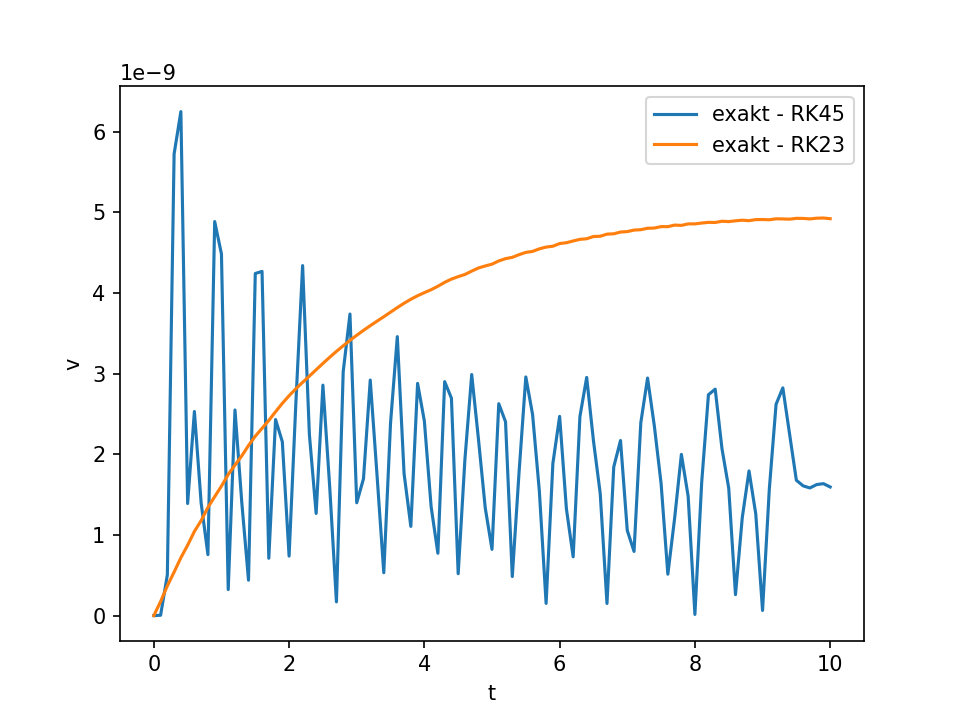

In [29]:
%matplotlib notebook
fig,ax = plt.subplots()
#
t = t_eval
v2 = 1./(0.1*t+1.)
v3 = sol1.y[0]
v4 = sol2.y[0]
#
ax.set_xlabel('t')
ax.set_ylabel('v')
#ax.plot(t, v2-v1, label = 'Euler')
#ax.plot(t, v2, label = 'exact')
#ax.plot(t,f(t_span,v2), label = 'Ableitung von v')
ax.plot(t, np.abs(v2-v3), label = 'exakt - RK45')
ax.plot(t, np.abs(v2-v4), label = 'exakt - RK23')
ax.legend()

## Der harmonische Oszillator
### Trägheitskraft + Federkraft = äußere Kraft
$$ m\cdot a(t) + k\cdot x(t) = f(t)$$

In [13]:
sol1.y

array([[1.        , 0.99009901, 0.98039213, 0.97087355, 0.96153795,
        0.95238019, 0.94339532, 0.93457852, 0.92592511, 0.91743058,
        0.90909056, 0.90090083, 0.89285732, 0.88495612, 0.87719345,
        0.8695657 , 0.86206939, 0.85470121, 0.84745668, 0.84032704,
        0.83330967, 0.82640278, 0.81960462, 0.81291341, 0.80632742,
        0.7998449 , 0.79346413, 0.7871834 , 0.78100102, 0.77491528,
        0.76892452, 0.76302706, 0.75722126, 0.75150547, 0.74587806,
        0.74033741, 0.73488191, 0.72950997, 0.72422   , 0.71901043,
        0.7138797 , 0.70882626, 0.70384856, 0.69894509, 0.69411433,
        0.68935477, 0.68466492, 0.68004331, 0.67548846, 0.67099892,
        0.66657324, 0.66220999, 0.65790774, 0.65366509, 0.64948064,
        0.64535299, 0.64128078, 0.63726264, 0.63329721, 0.62938316,
        0.62551915, 0.62170387, 0.61793602, 0.61421429, 0.6105374 ,
        0.60690409, 0.60331309, 0.59976316, 0.59625305, 0.59278155,
        0.58934744, 0.58594951, 0.58258659, 0.57